<a href="https://colab.research.google.com/github/wahyualvyy/Mining-Google-Scrapper/blob/main/Model_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload file data latih (.xlsx):


Saving train_data.xlsx to train_data.xlsx
Upload file data uji (.xlsx):


Saving test_data.xlsx to test_data.xlsx
Upload file data validasi (.xlsx):


Saving val_data.xlsx to val_data.xlsx
Dataset berhasil dimuat!
Data latih: (8752, 3)
Data uji: (2736, 3)
Data validasi: (2189, 3)

=== ANALISIS DATA LATIH ===
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        8752 non-null   object
 1   tweet_clean  8752 non-null   object
 2   label        8752 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 205.3+ KB
None

Distribusi label:
label
1    4390
0    4362
Name: count, dtype: int64

Persentase distribusi label:
label
1    50.159963
0    49.840037
Name: proportion, dtype: float64


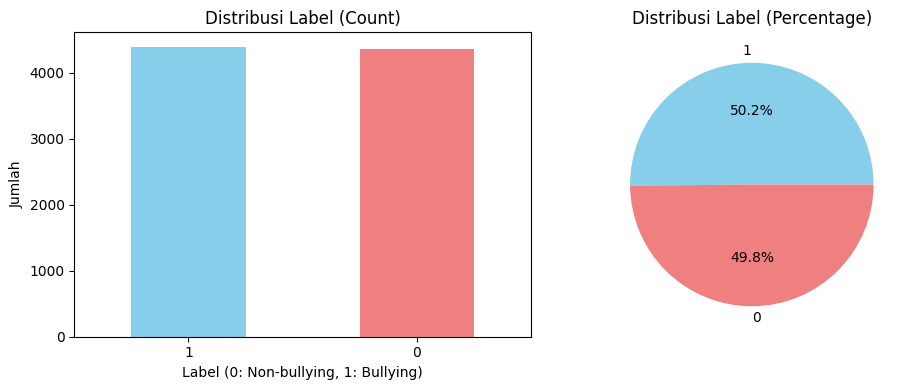


Contoh data:
                                               tweet  \
0   Lil Pump is the Nelson Mandela of our generation   
1        Kasasi ditolak Bun yani masuk lagi ke sel ;   
2  @RadenBoy19 @eedo_realman @Mdy_Asmara1701 Kl m...   
3  @ilymore91 Tidak akan ada nama provinsi Jawa B...   
4  @kurawa @ryofahri2 Kadrun pembual kelas berat ...   

                                         tweet_clean  label  
0                 lil pump nelson mandela generation      1  
1                    kasasi tolak bun yani masuk sel      0  
2  model dukung kelas kadrun tongpaling mentok aj...      1  
3  nama provinsi jawa barat pecah depok kayak pro...      0  
4  kadrun bual kelas berat awal kalimat jujursaya...      1  
Missing values: 0
Missing values: 0
Missing values: 0

Ukuran data setelah preprocessing:
Data latih: (8752, 3)
Data uji: (2736, 3)
Data validasi: (2189, 3)

=== FEATURE ENGINEERING ===
Shape fitur TF-IDF:
X_train: (8752, 5000)
X_test: (2736, 5000)
X_val: (2189, 5000)

=== TRA

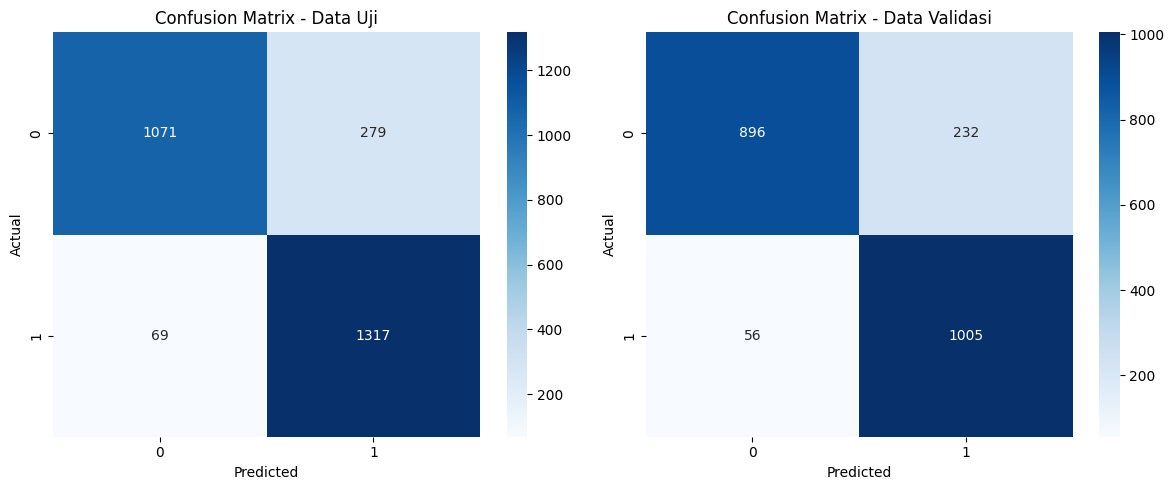


CLASSIFICATION REPORT:

Data Uji:
              precision    recall  f1-score   support

Non-Bullying       0.94      0.79      0.86      1350
    Bullying       0.83      0.95      0.88      1386

    accuracy                           0.87      2736
   macro avg       0.88      0.87      0.87      2736
weighted avg       0.88      0.87      0.87      2736


Data Validasi:
              precision    recall  f1-score   support

Non-Bullying       0.94      0.79      0.86      1128
    Bullying       0.81      0.95      0.87      1061

    accuracy                           0.87      2189
   macro avg       0.88      0.87      0.87      2189
weighted avg       0.88      0.87      0.87      2189


=== FEATURE IMPORTANCE ===
Top 20 Fitur Penting:
           feature  importance
857         cebong    0.068881
2011        kadrun    0.050936
1402        gerung    0.042131
2218         kerja    0.040858
3565          ppkm    0.036895
2131           kdm    0.035000
671          bodoh    0.0340

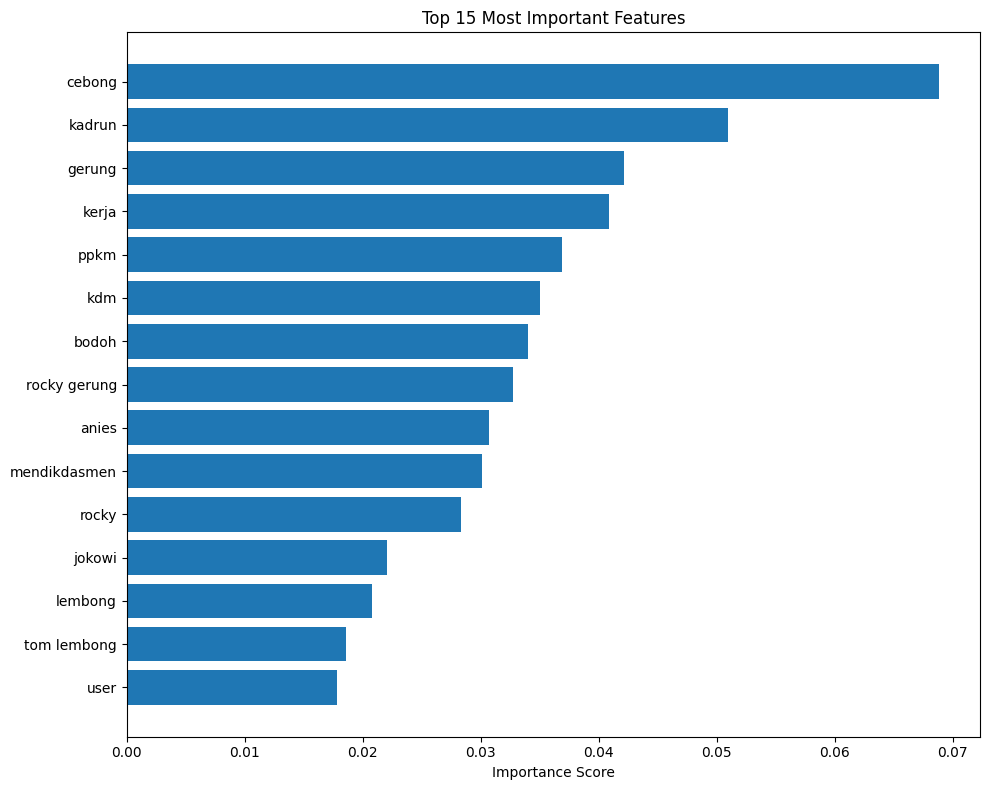


=== CROSS VALIDATION ===
Cross-validation scores: [0.86750428 0.85494003 0.87371429 0.87542857 0.86685714]
Mean CV accuracy: 0.8677 (+/- 0.0144)

=== UJI PREDIKSI ===
Hasil prediksi contoh teks:
1. 'You are stupid and worthless!'
   Prediksi: Bullying (Confidence: 51.04%)

2. 'Have a great day everyone!'
   Prediksi: Bullying (Confidence: 51.04%)

3. 'I hate you so much'
   Prediksi: Bullying (Confidence: 51.04%)

4. 'Thanks for helping me with this project'
   Prediksi: Bullying (Confidence: 51.04%)

=== RINGKASAN MODEL ===
Algoritma: Random Forest
Jumlah fitur: 5000
Jumlah pohon: 100
Akurasi terbaik: 0.8728
F1-Score terbaik: 0.8833

Model dan vectorizer berhasil disimpan!
File yang disimpan:
- random_forest_cyberbullying.pkl
- tfidf_vectorizer.pkl


In [1]:
# Random Forest untuk Deteksi Cyberbullying
# Google Colab Implementation

# 1. Install dan Import Library yang Diperlukan
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 2. Upload dan Load Dataset
from google.colab import files

print("Upload file data latih (.xlsx):")
uploaded_train = files.upload()
train_filename = list(uploaded_train.keys())[0]

print("Upload file data uji (.xlsx):")
uploaded_test = files.upload()
test_filename = list(uploaded_test.keys())[0]

print("Upload file data validasi (.xlsx):")
uploaded_val = files.upload()
val_filename = list(uploaded_val.keys())[0]

# Load datasets
df_train = pd.read_excel(train_filename)
df_test = pd.read_excel(test_filename)
df_val = pd.read_excel(val_filename)

print("Dataset berhasil dimuat!")
print(f"Data latih: {df_train.shape}")
print(f"Data uji: {df_test.shape}")
print(f"Data validasi: {df_val.shape}")

# 3. Exploratory Data Analysis
print("\n=== ANALISIS DATA LATIH ===")
print("Info dataset:")
print(df_train.info())

print("\nDistribusi label:")
print(df_train['label'].value_counts())

print("\nPersentase distribusi label:")
print(df_train['label'].value_counts(normalize=True) * 100)

# Visualisasi distribusi label
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df_train['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Label (Count)')
plt.xlabel('Label (0: Non-bullying, 1: Bullying)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df_train['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Label (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Contoh data
print("\nContoh data:")
print(df_train[['tweet', 'tweet_clean', 'label']].head())

# 4. Preprocessing Data
def preprocess_data(df):
    """Fungsi untuk preprocessing data"""
    # Cek missing values
    print(f"Missing values: {df.isnull().sum().sum()}")

    # Handle missing values jika ada
    df = df.dropna()

    # Pastikan kolom yang diperlukan ada
    required_cols = ['tweet', 'tweet_clean', 'label']
    for col in required_cols:
        if col not in df.columns:
            print(f"Warning: Kolom '{col}' tidak ditemukan!")

    return df

# Preprocess semua dataset
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)
df_val = preprocess_data(df_val)

print(f"\nUkuran data setelah preprocessing:")
print(f"Data latih: {df_train.shape}")
print(f"Data uji: {df_test.shape}")
print(f"Data validasi: {df_val.shape}")

# 5. Feature Engineering dengan TF-IDF
print("\n=== FEATURE ENGINEERING ===")

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,        # Maksimal 5000 fitur
    stop_words='english',     # Remove stop words
    ngram_range=(1, 2),       # Unigram dan bigram
    min_df=2,                 # Minimal muncul di 2 dokumen
    max_df=0.95              # Maksimal muncul di 95% dokumen
)

# Fit TF-IDF pada data latih menggunakan tweet_clean
X_train_tfidf = tfidf.fit_transform(df_train['tweet_clean'])
X_test_tfidf = tfidf.transform(df_test['tweet_clean'])
X_val_tfidf = tfidf.transform(df_val['tweet_clean'])

# Target variables
y_train = df_train['label']
y_test = df_test['label']
y_val = df_val['label']

print(f"Shape fitur TF-IDF:")
print(f"X_train: {X_train_tfidf.shape}")
print(f"X_test: {X_test_tfidf.shape}")
print(f"X_val: {X_val_tfidf.shape}")

# 6. Training Random Forest Model
print("\n=== TRAINING RANDOM FOREST MODEL ===")

# Inisialisasi Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,         # Jumlah pohon
    max_depth=10,            # Kedalaman maksimal
    min_samples_split=5,     # Minimal sampel untuk split
    min_samples_leaf=2,      # Minimal sampel di leaf
    random_state=42,         # Untuk reproducibility
    n_jobs=-1               # Gunakan semua core
)

# Training model
print("Training model...")
rf_model.fit(X_train_tfidf, y_train)
print("Model berhasil dilatih!")

# 7. Evaluasi Model
print("\n=== EVALUASI MODEL ===")

# Prediksi pada data uji
y_test_pred = rf_model.predict(X_test_tfidf)
y_test_pred_proba = rf_model.predict_proba(X_test_tfidf)

# Prediksi pada data validasi
y_val_pred = rf_model.predict(X_val_tfidf)
y_val_pred_proba = rf_model.predict_proba(X_val_tfidf)

# Hitung metrics untuk data uji
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Hitung metrics untuk data validasi
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

# Tampilkan hasil
print("HASIL EVALUASI:")
print(f"\nData Uji:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

print(f"\nData Validasi:")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall:    {val_recall:.4f}")
print(f"F1-Score:  {val_f1:.4f}")

# 8. Confusion Matrix
print("\n=== CONFUSION MATRIX ===")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix untuk data uji
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Data Uji')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix untuk data validasi
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Data Validasi')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 9. Classification Report
print("\nCLASSIFICATION REPORT:")
print("\nData Uji:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Bullying', 'Bullying']))

print("\nData Validasi:")
print(classification_report(y_val, y_val_pred, target_names=['Non-Bullying', 'Bullying']))

# 10. Feature Importance
print("\n=== FEATURE IMPORTANCE ===")

# Ambil feature names dari TF-IDF
feature_names = tfidf.get_feature_names_out()
importance_scores = rf_model.feature_importances_

# Buat DataFrame untuk feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

# Tampilkan top 20 fitur penting
print("Top 20 Fitur Penting:")
print(feature_importance.head(20))

# Visualisasi top 15 fitur penting
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 11. Cross Validation
print("\n=== CROSS VALIDATION ===")
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 12. Prediksi pada Contoh Baru
print("\n=== UJI PREDIKSI ===")

def predict_cyberbullying(text):
    """Fungsi untuk prediksi teks baru"""
    # Transform teks menggunakan TF-IDF yang sudah dilatih
    text_tfidf = tfidf.transform([text])

    # Prediksi
    prediction = rf_model.predict(text_tfidf)[0]
    probability = rf_model.predict_proba(text_tfidf)[0]

    # Hasil
    label = "Bullying" if prediction == 1 else "Non-Bullying"
    confidence = max(probability) * 100

    return label, confidence

# Contoh prediksi
contoh_teks = [
    "You are stupid and worthless!",
    "Have a great day everyone!",
    "I hate you so much",
    "Thanks for helping me with this project"
]

print("Hasil prediksi contoh teks:")
for i, teks in enumerate(contoh_teks, 1):
    label, confidence = predict_cyberbullying(teks)
    print(f"{i}. '{teks}'")
    print(f"   Prediksi: {label} (Confidence: {confidence:.2f}%)")
    print()

# 13. Ringkasan Model
print("=== RINGKASAN MODEL ===")
print(f"Algoritma: Random Forest")
print(f"Jumlah fitur: {X_train_tfidf.shape[1]}")
print(f"Jumlah pohon: {rf_model.n_estimators}")
print(f"Akurasi terbaik: {max(test_accuracy, val_accuracy):.4f}")
print(f"F1-Score terbaik: {max(test_f1, val_f1):.4f}")

# 14. Simpan Model (opsional)
import joblib

# Simpan model dan vectorizer
joblib.dump(rf_model, 'random_forest_cyberbullying.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("\nModel dan vectorizer berhasil disimpan!")
print("File yang disimpan:")
print("- random_forest_cyberbullying.pkl")
print("- tfidf_vectorizer.pkl")